# (Prosper Loans Data Analysis)
## by (kalyan pesala)

## Introduction

> This project is on a data set from Prosper, which is America’s first marketplace lending platform, with over $7 billion in funded loans. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information.

The main purpose of this project is to summarize the characteristics of variables that can affect the loan status and to get some ideas about the relationships among multiple variables using summary statistics and data visualizations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.shape

(113937, 81)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: Loan Status.

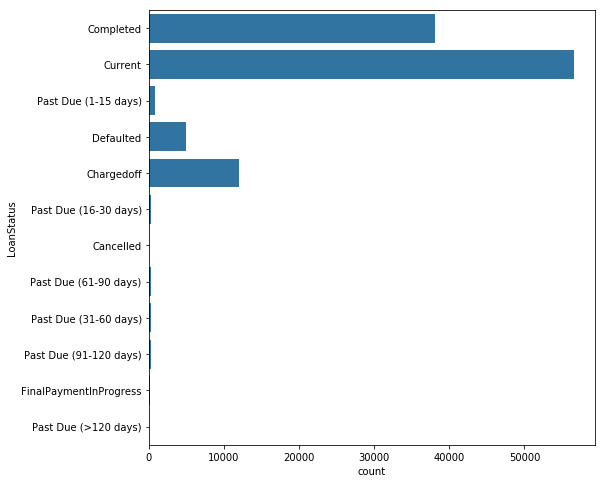

In [6]:
plt.figure(figsize = (8,8))
sns.countplot(data = df, y = 'LoanStatus', color = sns.color_palette()[0]);

Most of the loans falls under current status. For better analysis we could group PastDue loans as one status

In [7]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

Next, lets do some analysis on borrower's information. First, will start with credit score.

c:\users\kalya\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\kalya\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


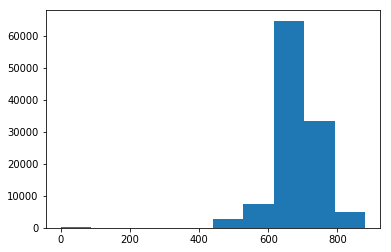

In [8]:
plt.hist(df.CreditScoreRangeLower);

In [9]:
df[df.CreditScoreRangeLower == 0][['CreditScoreRangeLower','LoanStatus','CreditScoreRangeUpper']].sample(5)

,CreditScoreRangeLower,LoanStatus,CreditScoreRangeUpper
102229,0.0,Chargedoff,19.0
92382,0.0,Completed,19.0
49993,0.0,Completed,19.0
30460,0.0,Completed,19.0
37879,0.0,Defaulted,19.0


Credit score can never be zero. what 0 means here is the borrower does not have a credit score.

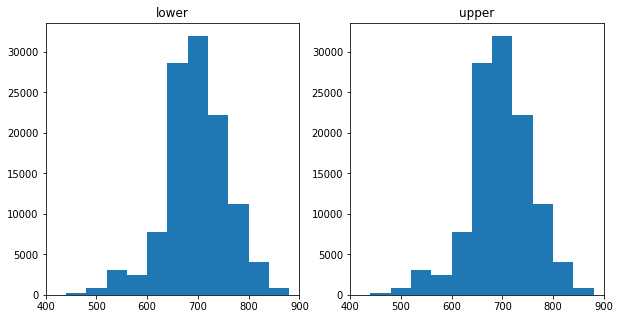

In [10]:
#set the limit to x-limit to zoom in the values
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
bin_edges = np.arange(400,df.CreditScoreRangeLower.max() + 40,40)
plt.hist(df.CreditScoreRangeLower, bins = bin_edges)
plt.title('lower')
plt.xlim((400,900))

plt.subplot(1,2,2)
bin_edges = np.arange(400,df.CreditScoreRangeUpper.max() + 40,40)
plt.hist(df.CreditScoreRangeUpper, bins = bin_edges)
plt.title('upper')
plt.xlim((400,900));

Both upper and lower range have the same distribution. left skewed with a short tail with the peak at 700

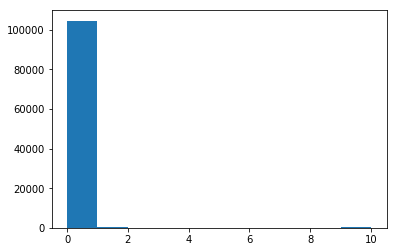

In [11]:
plt.hist(df.DebtToIncomeRatio);

since most of the values are between 0 an 1 limit the x-axis

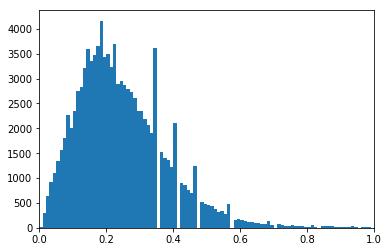

In [12]:
bin_edges = np.arange(0,1,0.01)
plt.hist(df.DebtToIncomeRatio,bins = bin_edges)
plt.xlim((0,1));

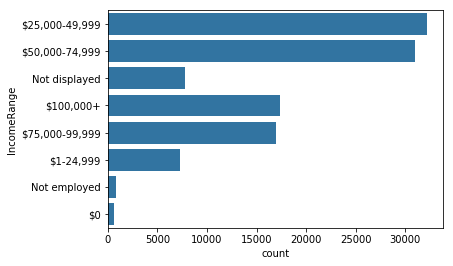

In [13]:
sns.countplot(y = df.IncomeRange, color = sns.color_palette()[0])

(25,000 to 50,000 and 50,000 to 75,000) has almost same number of loans but do their loan stauts distribution will be same? We can also look at how DebtToIncomeRatio is in the income range buckets for each loan status

what is the Distribution of IsBorrowerHomeowner ?

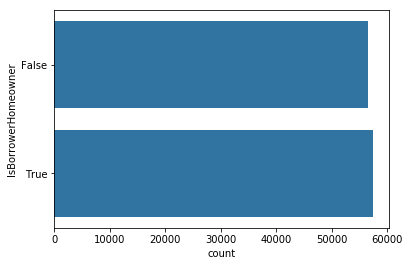

In [14]:
sns.countplot(y = df.IsBorrowerHomeowner, color = sns.color_palette()[0]);

we can look at the loan status distribution for both these cases and see is there any difference?

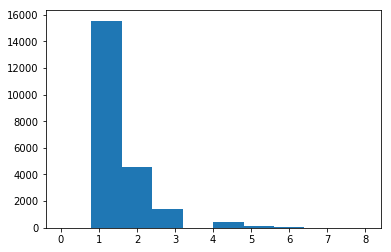

In [15]:
plt.hist(df.TotalProsperLoans); #only for the borrowers who took the prosper loans before

In [16]:
df.TotalProsperLoans.isnull().sum() #borrowers who don't have any prior prosper loans

91852

We can create a new variable for new borrower or existing borrower. For existing borrowers we can include extra information and look at the factors affecting the loan status.

Let's look at existent borrowers related variables in our data

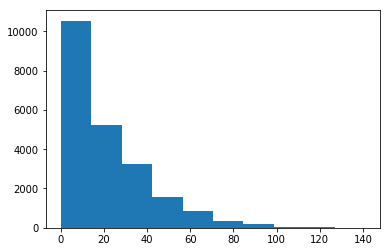

In [17]:
plt.hist(df.OnTimeProsperPayments);

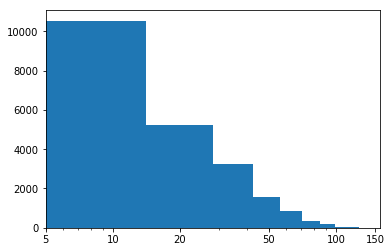

In [18]:
#let's put in the log scale instead
bin_edges = 10 ** np.arange(0, np.log10(df.OnTimeProsperPayments.max())+0.1, 0.1)
plt.hist(df.OnTimeProsperPayments)
plt.xscale('log')
tick_locs = [5,10,20,50,100,150]
plt.xticks(tick_locs,tick_locs);

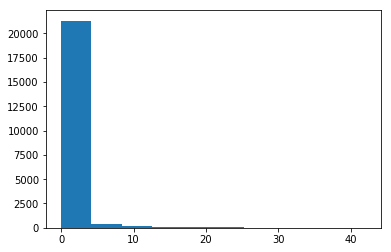

In [19]:
plt.hist(df.ProsperPaymentsLessThanOneMonthLate);

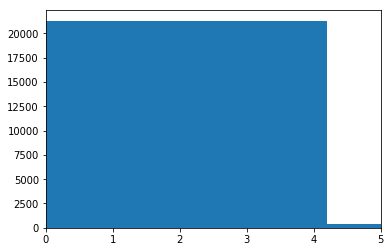

In [20]:
#most of the values are falling between 0 to 5 let's limit the x axis to zoom in
plt.hist(df.ProsperPaymentsLessThanOneMonthLate)
plt.xlim(0,5);

ProsperPaymentsLessThanOneMonthLate most of the values are between 0 to 4

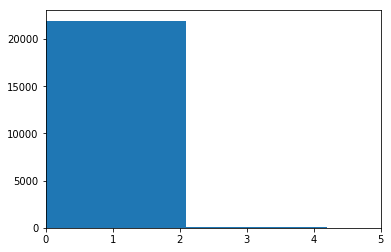

In [21]:
#most of the values are falling between 0 to 5 let's limit the x axis to zoom in
plt.hist(df.ProsperPaymentsOneMonthPlusLate)
plt.xlim(0,5);

ProsperPaymentsOneMonthPlusLate most of the values are between 0 to 2

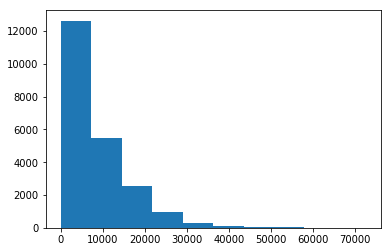

In [22]:
plt.hist(df.ProsperPrincipalBorrowed);

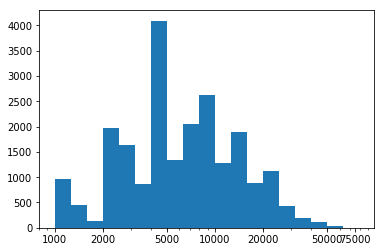

In [23]:
#let's put in th log scale instead
bin_edges = 10 ** np.arange(3, np.log10(df.ProsperPrincipalBorrowed.max())+0.1, 0.1)
plt.hist(df.ProsperPrincipalBorrowed, bins = bin_edges)
plt.xscale('log')
tick_locs = [1000, 2000, 5000,10000,20000,50000,75000]
plt.xticks(tick_locs, tick_locs);

Most of the values are falling between 4000 and 5000

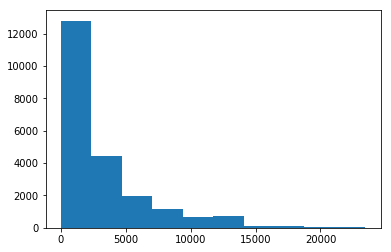

In [24]:
plt.hist(df.ProsperPrincipalOutstanding);

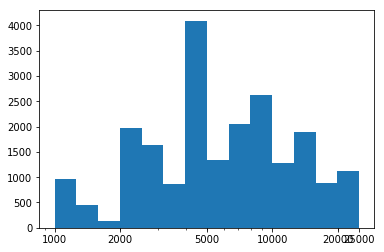

In [25]:
#let's put in the log scale instead
bin_edges = 10 ** np.arange(3, np.log10(df.ProsperPrincipalOutstanding.max())+0.1, 0.1)
plt.hist(df.ProsperPrincipalBorrowed, bins = bin_edges)
plt.xscale('log')
tick_locs = [1000, 2000, 5000,10000,20000,25000]
plt.xticks(tick_locs, tick_locs);

Most of the values are falling between 4000 and 5000 of outstanding amount

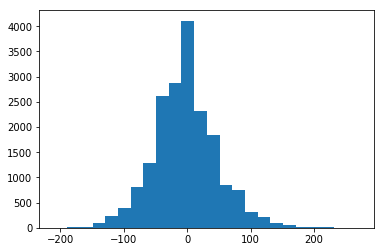

In [26]:
bin_edges = np.arange(df.ScorexChangeAtTimeOfListing.min(),df.ScorexChangeAtTimeOfListing.max(),20)
plt.hist(df.ScorexChangeAtTimeOfListing, bins = bin_edges);

ScorexChangeAtTimeOfListing is normally distributed

We have looked at borrowers information in general like credit score, income. And then we looked at the borrowers information of existing customers with prosper. Other factors that can affect loan status are loan information like amount, loan term, loan duration so let's look at those as well.

In [27]:
df.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

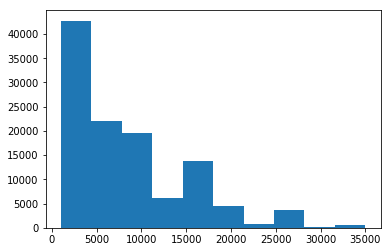

In [28]:
plt.hist(df.LoanOriginalAmount);

In [29]:
df.LoanOriginalAmount.max()

35000

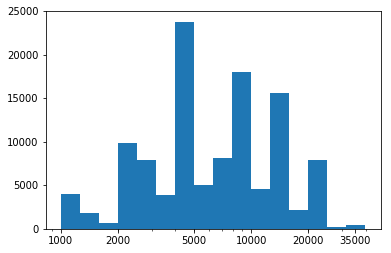

In [30]:
#let's put in the log scale instead
bin_edges = 10 ** np.arange(3, np.log10(df.LoanOriginalAmount.max())+0.1, 0.1)
plt.hist(df.LoanOriginalAmount, bins = bin_edges)
plt.xscale('log')
tick_locs = [1000, 2000, 5000,10000,20000,35000]
plt.xticks(tick_locs, tick_locs);

Most of the loan amount values are between 4000 and 5000. which is also the case for ProsperPrincipalBorrowed.

## Bivariate Analysis

Distribution of credit scores for each loan status

In [31]:
base_color = sns.color_palette()[0]

In [32]:
df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

so many categorical levels in LoanStatus. so let's group those categories for better visualization

In [33]:
def group_loan_status(data):
    if '(' in data:
        return 'Past Due'
    elif data == 'FinalPaymentInProgress':
        return 'Completed'
    else:
        return data

In [34]:
df['LoanStatusGroup'] = df.LoanStatus.apply(group_loan_status)
df['LoanStatusGroup'].unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled'], dtype=object)

In [35]:
df[df.LoanStatusGroup == 'Cancelled']

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanStatusGroup
332,093D3365430569291709120,8912,2006-04-26 22:23:10.147000000,HR,36,Cancelled,2006-05-31 00:00:00,0.25650,0.2375,0.2325,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,6,Cancelled
59998,F77F33664545520971829DC,7646,2006-04-25 07:59:15.203000000,C,36,Cancelled,2006-05-31 00:00:00,0.14659,0.1395,0.1345,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,62,Cancelled
72480,09E1336627538645259AE42,908,2006-02-28 08:18:58.527000000,HR,36,Cancelled,2006-03-29 00:00:00,0.20735,0.2000,0.1950,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,23,Cancelled
97281,29453366240667435235AEE,11364,2006-05-05 03:16:59.510000000,HR,36,Cancelled,2006-05-31 00:00:00,0.25650,0.2375,0.2325,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,7,Cancelled
112975,E77E34330098056070F5C30,410006,2008-10-07 17:09:34.653000000,A,36,Cancelled,2008-10-16 00:00:00,0.16219,0.1075,0.0975,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,25,Cancelled


Only 5 rows are cancelled in the entire data set so let's remove them after copying the original dataset.

In [36]:
df_original = df.copy()
df = df[df.LoanStatusGroup != 'Cancelled']
df['LoanStatusGroup'].unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff'],
      dtype=object)

Next, as observed in the univariate analysis credit score values contains 0's. it means borrower don't have credit score so we can remove those in our visualization.

In [37]:
df.CreditScoreRangeLower.sort_values().unique()

array([  0., 360., 420., 440., 460., 480., 500., 520., 540., 560., 580.,
       600., 620., 640., 660., 680., 700., 720., 740., 760., 780., 800.,
       820., 840., 860., 880.,  nan])

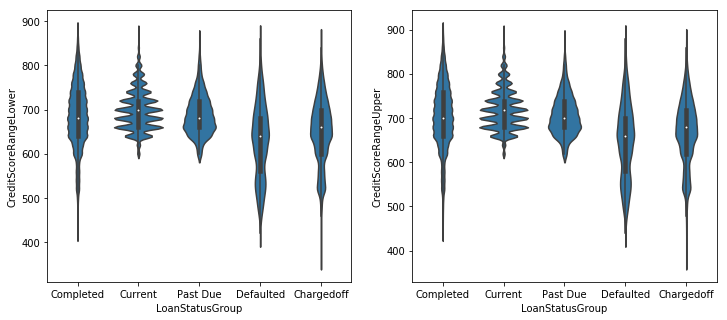

In [38]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.violinplot(data = df[df.CreditScoreRangeLower != 0], x = 'LoanStatusGroup', y = 'CreditScoreRangeLower', color = base_color)

plt.subplot(1,2,2)
sns.violinplot(data = df[df.CreditScoreRangeUpper != 19], x = 'LoanStatusGroup', y = 'CreditScoreRangeUpper',color = base_color)

- most of the Current loans are higher than 600.
- past due loans have wider bottom.
- default and charged off loans have almost same distribution but the median is higher for charged off loans and have wider distribution around the median.

Let's see the distribution of DTI for each loan status. as observed in the loan status most of the values are between 0 and 1 but there are some extreme values in the distribution this may squeeze the violin plots so lets limit the DTI to (0 to 1) and also plot the DTI averages for each loan status including the extreme values as well.

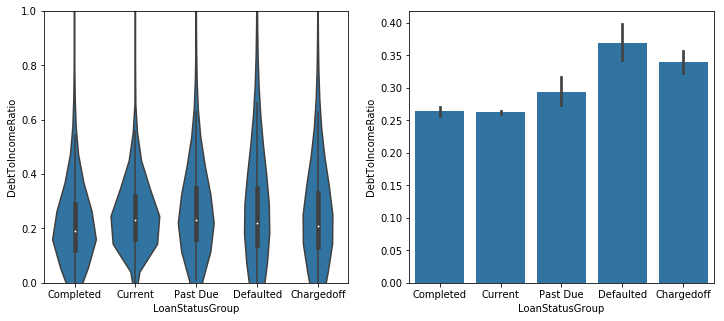

In [39]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.violinplot(data = df, x = 'LoanStatusGroup', y = 'DebtToIncomeRatio',color = base_color)
plt.ylim(0,1)

plt.subplot(1,2,2)
sns.barplot(data = df, x = 'LoanStatusGroup', y = 'DebtToIncomeRatio',color = base_color);

DTI for completed and current has wider distribution at bottom.

let's look at the distribution of loan status at each level. As observed in the univariate analysis of LoanStatus most of the values are current and completed. so will focus on the other loan statuses 

In [40]:
#base is loan status
def bar_plot(data,x,hue):
    plt.figure(figsize = (10,8))
    groupby = (data.groupby([x,hue])['LoanStatus'].count() / data.groupby([hue])['LoanStatus'].count()).reset_index()
    chart = sns.barplot(y=x, hue=hue, x='LoanStatus', data=groupby) #for horizontal bar plot x, y is reversed
    #chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    chart.set(xlabel='Percentages')
    plt.show()

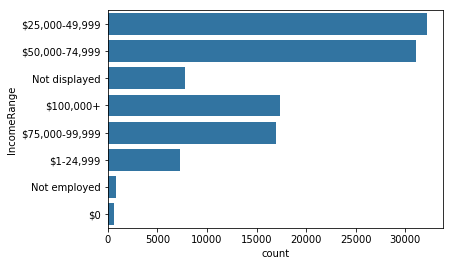

In [41]:
sns.countplot(data = df, y = 'IncomeRange',color = base_color) #again plotting it for the refernce 

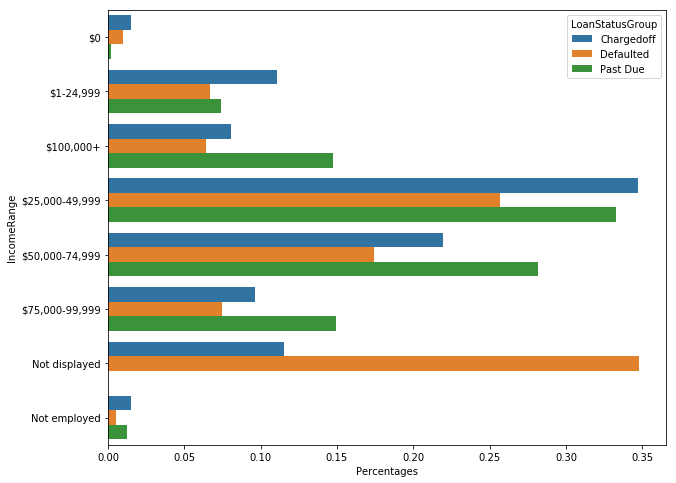

In [42]:
bar_plot(data = df[(df.LoanStatusGroup != 'Completed') & (df.LoanStatusGroup != 'Current')], x = 'IncomeRange',hue = 'LoanStatusGroup')

results from bar_plot is showing the percentage of each loan status in the income range categories. for example, take charged-off loans and income range of (25,000 - 49,999) from the above graph. interpretation of that is the percentage of charged off loans from the total charged off loans in income range of (25,000 - 49,999) is 35%.

Though, Incomerange of (25,000 - 49,999) and (50,000 - 74,999) has almost equal number of loans but 35% of total charged off loans are in (25,000 - 49,999) where as in (50,000 - 74,999) has only around 22% of total charged off loans.

In [43]:
df.IsBorrowerHomeowner.value_counts()

True     57476
False    56456
Name: IsBorrowerHomeowner, dtype: int64

As observed, in the univariate analysis both category levels of IsBorrowerHomeowner has same number of loans. But do they follow same distribution?

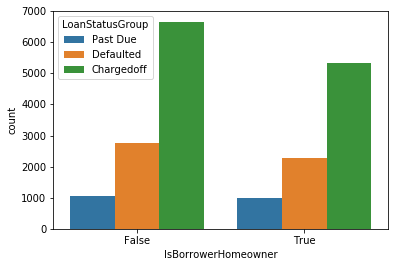

In [44]:
sns.countplot(data = df[(df.LoanStatusGroup != 'Completed') & (df.LoanStatusGroup != 'Current')],x = 'IsBorrowerHomeowner',hue = 'LoanStatusGroup');

Though Both category levels have same number of loans. (chargedoff,defaulted,pastdue) loans are much higher when IsBorrowerHomeowner is False.

let's create a new variable for ScorexChangeAtTimeOfListing whether it is positive or not

In [45]:
def get_categories(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    elif x == 0:
        return 'Not changed'
    else:
        return x
    
df['cat_ScorexChange'] = df.ScorexChangeAtTimeOfListing.apply(get_categories)
df['cat_ScorexChange'].value_counts()

negative       9828
positive       7973
Not changed    1127
Name: cat_ScorexChange, dtype: int64

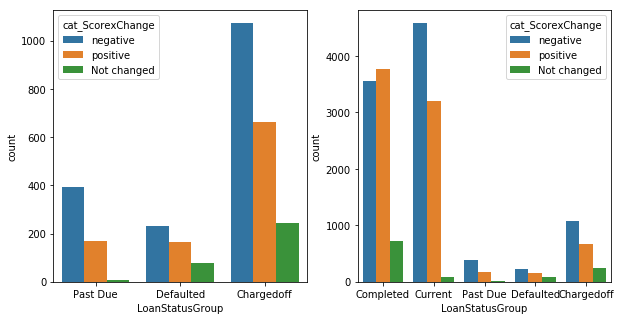

In [46]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(data = df[(df.LoanStatusGroup != 'Completed') & (df.LoanStatusGroup != 'Current')],\
              x = 'LoanStatusGroup', hue = 'cat_ScorexChange',hue_order = df['cat_ScorexChange'].value_counts().index.values)
plt.subplot(1,2,2)
sns.countplot(data = df,x = 'LoanStatusGroup', hue = 'cat_ScorexChange',hue_order = df['cat_ScorexChange'].value_counts().index.values)

(charged off, past due,defaulted) all have the high negative values. even current loans also have high negative values

We can look at how factors are affecting the loan status in each quarter and then make decisions based on the quarter. I am looking at the quarterly level because the borrower's spending can vary on different quarters.

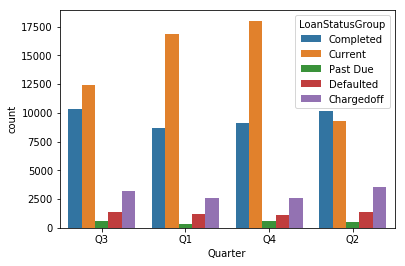

In [49]:
df['Quarter'] = df.LoanOriginationQuarter.str[:2]
sns.countplot(df.Quarter,hue = df.LoanStatusGroup)

In [50]:
#create a new variable to check whether he is existing borrower or new
df['borrower'] = df.TotalProsperLoans.apply(lambda x : 'existing' if x >= 1 else 'new')

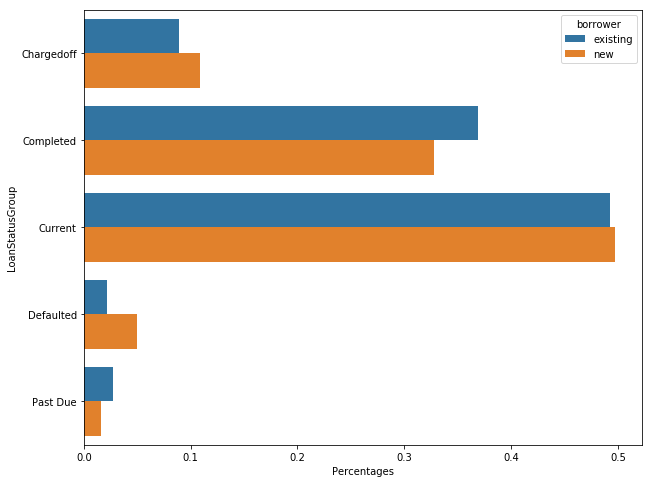

In [51]:
bar_plot(data = df, x = 'LoanStatusGroup', hue = 'borrower')

percentage of charged off and defaulted loans from the total existing customers are less when compared to percentage of charged off and defaulted loans from the total new customers. Which suggests to predict loan status borrower prosper history is more important than the general history of borrower.

let's look at the relation between prosper score and credit score. since the prosper score is discrete data let's add jitter and transperency to avoid overplotting

To get a single score from lower and upper ranges of credit scaore take an average of both

In [52]:
df['CreditScoreAverage'] = (df.CreditScoreRangeLower + df.CreditScoreRangeUpper) / 2

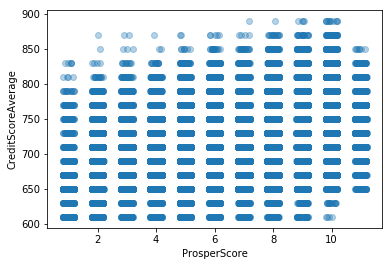

In [53]:
sns.regplot(data = df, x = 'ProsperScore', y = 'CreditScoreAverage', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

As prosper score increases the credit score is also incresing. And prosper score with 10 also have the credit scores around 600 

What is the Distribution of credit scores for each loan status?

(400, 920)

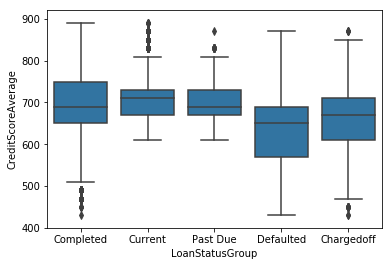

In [54]:
sns.boxplot(x = df.LoanStatusGroup, y = df.CreditScoreAverage, color = base_color)
plt.ylim(400,920)

## Multivariate Analysis

(400, 920)

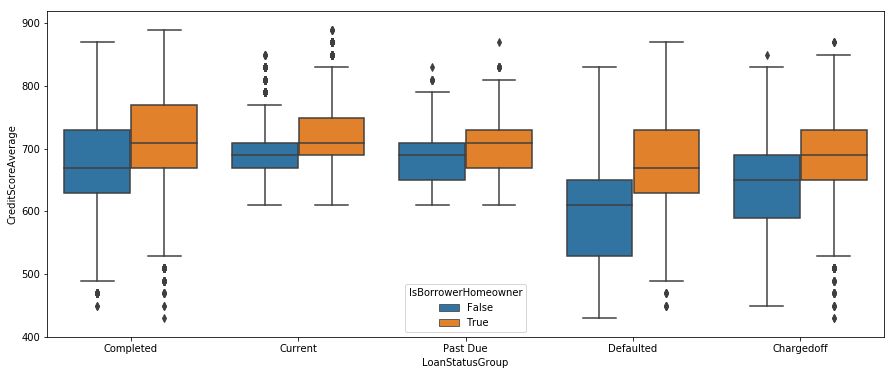

In [55]:
g = sns.boxplot(data=df, x='LoanStatusGroup', y='CreditScoreAverage', hue='IsBorrowerHomeowner');
g.figure.set_figwidth(15)
g.figure.set_figheight(6)
plt.ylim(400,920)

Though CreditScoreAverage for non home owners follows the same distribution as observed in bivariate analysis. for home owners the creditscoreAverage has different distribution is quite evident in the defaulted and chargedoff loans.

Let's look at the relation between DTI, income range and loan status

As observed in the univariate analysis, most of the DTI values are between 0 to 1. 

In [64]:
df['IncomeRange'].value_counts()

$25,000-49,999    32191
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7737
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

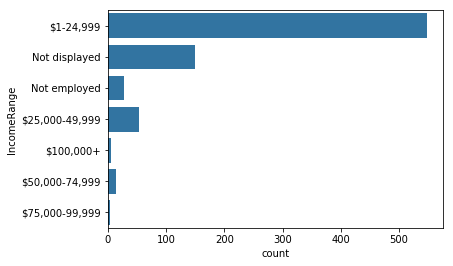

In [59]:
sns.countplot(y = df[df.DebtToIncomeRatio > 1]['IncomeRange'],color = base_color )

Most of the DTI values with more than 1 are from (1-24,999) category so if we include these we will be biasing our results. because (1-24,999) category has less than 10 percent with DTI greater than 1 but these can change the average values drastically.  

Text(0.5, 1.0, 'With 0 to 1 values')

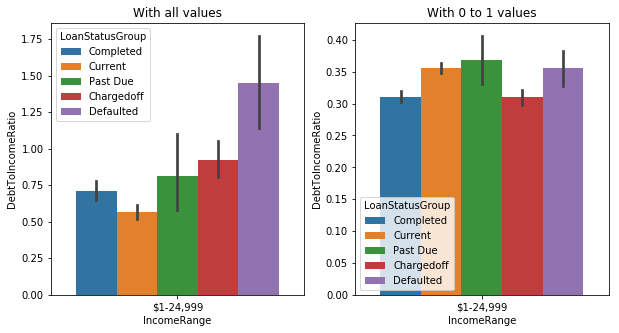

In [63]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
data = df[df.IncomeRange.isin(['$1-24,999'])]
sns.barplot(data = data, x = 'IncomeRange', y = 'DebtToIncomeRatio', hue = 'LoanStatusGroup')
plt.title('With all values')

plt.subplot(1,2,2)
data = df[(df.DebtToIncomeRatio <= 1) & (df.IncomeRange.isin(['$1-24,999']))]
sns.barplot(data = data, x = 'IncomeRange', y = 'DebtToIncomeRatio', hue = 'LoanStatusGroup')
plt.title('With 0 to 1 values')

In ($1-24,999) income category if we consider all the values then if the DTI average is greater than 0.75 then most probably it is one of the (chargedoff,defaulted,pastdue) loans and less than 0.75 it's either current or completed loans. this conclusion is false because these average values are affected by the extreme values. if we remove these rest about more than 90% follows the different distribution and their average DTI for defaulted and charged off loans are less.

## Summary of Findings

 - DTI values ranges from 0 to 10. But most of the values are between 0 an 1.
 - Though, Incomerange of (25,000 - 49,999) and (50,000 - 74,999) has almost equal number of loans but 35% of total charged off loans are in (25,000 - 49,999) where as in (50,000 - 74,999) has only around 22% of total charged off loans.
 - Most of the DTI values with more than 1 are from (1-24,999) category so if we include these we will be biasing our results. because (1-24,999) category has less than 10 percent with DTI greater than 1 but these can change the average values drastically.
 - Though Both category levels of IsBorrowerHomeowner have same number of loans. (chargedoff,defaulted,pastdue) loans are much higher when IsBorrowerHomeowner is False.
 - Though CreditScoreAverage for non home owners follows the same distribution as observed in bivariate analysis. for home owners the creditscoreAverage has different distribution is quite evident in the defaulted and chargedoff loans.
 - Percentage of charged off and defaulted loans from All existing customers are less when compared to percentage of charged off and defaulted loans from All new customers. Which suggests to predict loan status, borrower prosper history is more important than the general history of borrower.
 - Prosper score with 10(best) also have the credit scores around 600



## Key Insights for Presentation

 - In ($1-24,999) income category if we consider all the loans then if the DTI average is greater than 0.75 then most probably it is one of the (chargedoff,defaulted,pastdue) loans and less than 0.75 it's either current or completed loans this conclusion is false because these average values are affected by the extreme values. if we remove the extreme cases about more than 90 percent of loans follows the different distribution and their average DTI for defaulted and charged off loans are less.
 - Distribution of loan status for existing customers are better than the new customers.
 - Distribution of credit scores are different for home owners in each loan status it is clearly evident in Defaulted loan status.